# Avacado Project


Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 

--------------
Task:
The dataset can be seen in two angles to find the region and find the average price .
 - One of Classification and other of Regression

 - Do both tasks in the same .ipynb file and submit at single file. 

 - To download the dataset, use the link given below. 

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'Z:\ML Datasets\Avacado.csv')

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [6]:
#changing date datatype to int  -->  yyyy-mm-dd to yyyymmdd
df['Date'] = df['Date'].str.replace("-","").astype(int)

#label encoding on region
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])
df['type'] = le.fit_transform(df['type'])

#dropping year as we have the same data in Date column and Unnamed: 0 column
df = df.drop(['year', 'Unnamed: 0'], axis = 1)

In [7]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,20151227,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,20151220,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,20151213,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,20151206,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,20151129,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,20180204,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,53
18245,20180128,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,53
18246,20180121,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,53
18247,20180114,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,53


# EDA 

In [8]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
region             54
dtype: int64

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

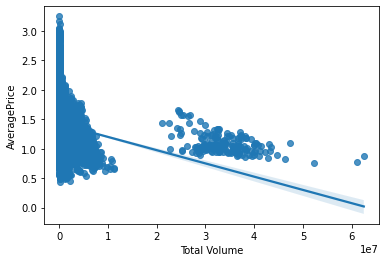

In [9]:
sns.regplot(data = df, x = 'Total Volume', y = 'AveragePrice')

<AxesSubplot:xlabel='4046', ylabel='AveragePrice'>

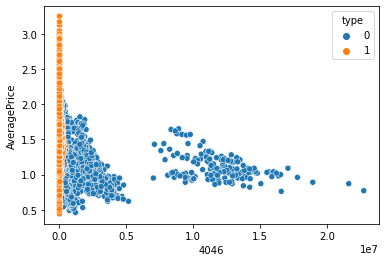

In [10]:
sns.scatterplot(data = df, x = '4046', y = 'AveragePrice', hue = 'type')

<AxesSubplot:xlabel='4225', ylabel='AveragePrice'>

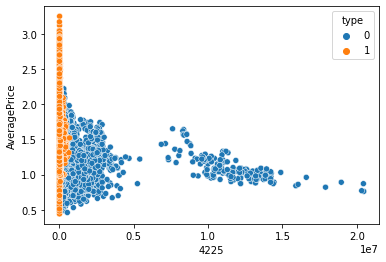

In [11]:
sns.scatterplot(data = df, x = '4225', y = 'AveragePrice', hue = 'type')

<AxesSubplot:xlabel='4770', ylabel='AveragePrice'>

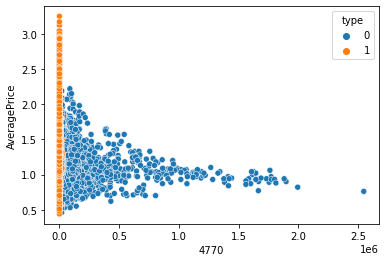

In [12]:
sns.scatterplot(data = df, x = '4770', y = 'AveragePrice', hue = 'type')

<AxesSubplot:xlabel='Total Bags', ylabel='AveragePrice'>

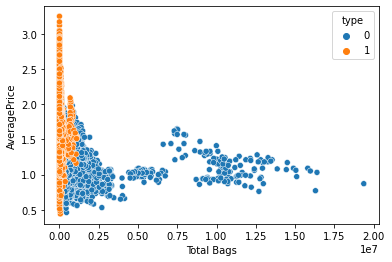

In [13]:
sns.scatterplot(data = df, x = 'Total Bags', y = 'AveragePrice', hue = 'type')

<AxesSubplot:xlabel='Small Bags', ylabel='AveragePrice'>

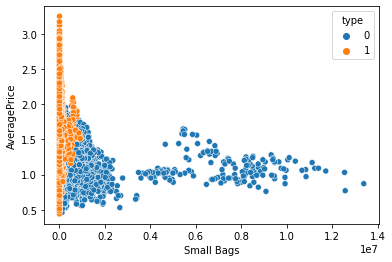

In [14]:
sns.scatterplot(data = df, x = 'Small Bags', y = 'AveragePrice', hue = 'type')

<AxesSubplot:xlabel='Large Bags', ylabel='AveragePrice'>

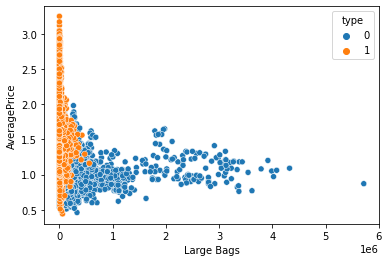

In [15]:
sns.scatterplot(data = df, x = 'Large Bags', y = 'AveragePrice', hue = 'type')

<AxesSubplot:xlabel='XLarge Bags', ylabel='AveragePrice'>

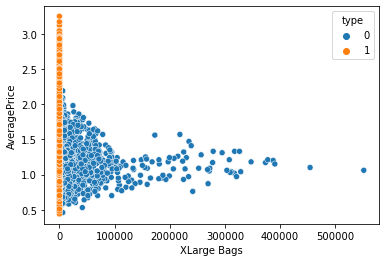

In [16]:
sns.scatterplot(data = df, x = 'XLarge Bags', y = 'AveragePrice', hue = 'type')

<AxesSubplot:xlabel='type', ylabel='count'>

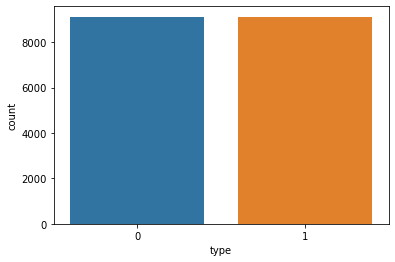

In [17]:
sns.countplot(df['type'])

<AxesSubplot:xlabel='Date', ylabel='AveragePrice'>

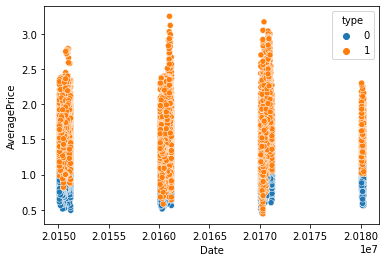

In [18]:
sns.scatterplot(data = df, x = 'Date', y = 'AveragePrice', hue = 'type')

# Correlation

In [19]:
df.corr()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
Date,1.000000,0.099925,0.016353,0.002388,-0.010464,-0.038023,0.071117,0.063420,0.087647,0.081029,-0.000036,-0.000061
AveragePrice,0.099925,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,-0.011716
Total Volume,0.016353,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.174176
4046,0.002388,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.192073
4225,-0.010464,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,0.145726
4770,-0.038023,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,0.095252
Total Bags,0.071117,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.175256
Small Bags,0.063420,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.164702
Large Bags,0.087647,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.198768
XLarge Bags,0.081029,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.082281


In [20]:
df.corr().sum()

Date            1.373296
AveragePrice    0.308261
Total Volume    7.147670
4046            6.881046
4225            6.838833
4770            6.234582
Total Bags      7.174279
Small Bags      7.147907
Large Bags      6.704525
XLarge Bags     6.007375
type           -0.092024
region          2.216177
dtype: float64

<AxesSubplot:>

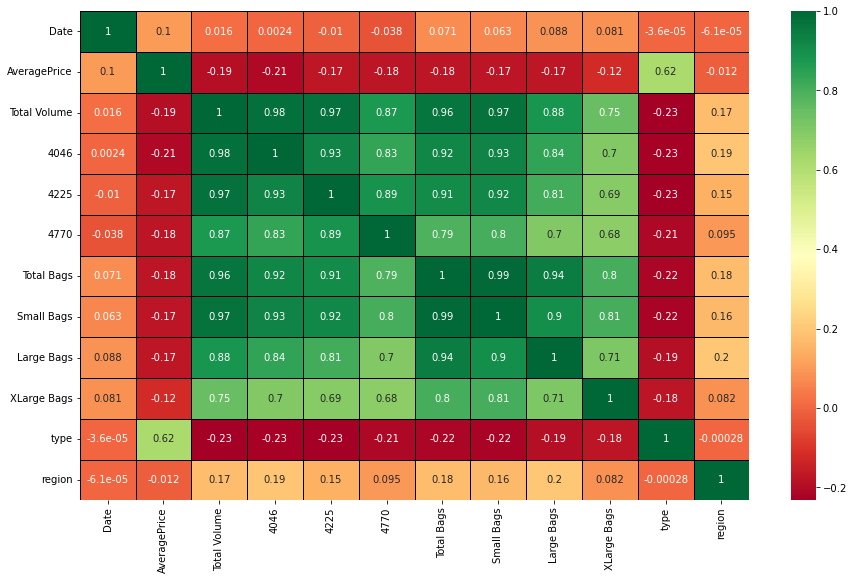

In [21]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, linecolor = 'black', cmap = 'RdYlGn')

In [22]:
x = df.drop(['AveragePrice'], axis = 1) #dropping target

In [23]:
def correlation(dataset, threshold):              #creating fucntion with 2 values
    corr_columns = set()                          #set of all the names of correlated columns
    corr = dataset.corr()                         #correlation function
    for i in range (len(corr.columns)):           #i and j are the columns from x and y axes 
        for j in range(i):
            if abs(corr.iloc[i,j]) > threshold:   #absolute coefficient values
                columns = corr.columns[i]         #getting the name of the columns
                corr_columns.add(columns)
    return corr_columns

In [24]:
corr_feat = correlation(x, 0.8)
corr_feat

{'4046',
 '4225',
 '4770',
 'Large Bags',
 'Small Bags',
 'Total Bags',
 'XLarge Bags'}

In [25]:
df1 = df.drop(corr_feat, axis =1, inplace = True)
df1 = df.drop(['Date'], axis = 1)
df1

,AveragePrice,Total Volume,type,region
0,1.33,64236.62,0,0
1,1.35,54876.98,0,0
2,0.93,118220.22,0,0
3,1.08,78992.15,0,0
4,1.28,51039.60,0,0
...,...,...,...,...
18244,1.63,17074.83,1,53
18245,1.71,13888.04,1,53
18246,1.87,13766.76,1,53
18247,1.93,16205.22,1,53


In [26]:
X = df1.drop(['AveragePrice'], axis = 1)
Y = df1['AveragePrice']

AveragePrice       AxesSubplot(0.125,0.125;0.110714x0.755)
Total Volume    AxesSubplot(0.257857,0.125;0.110714x0.755)
type            AxesSubplot(0.390714,0.125;0.110714x0.755)
region          AxesSubplot(0.523571,0.125;0.110714x0.755)
dtype: object

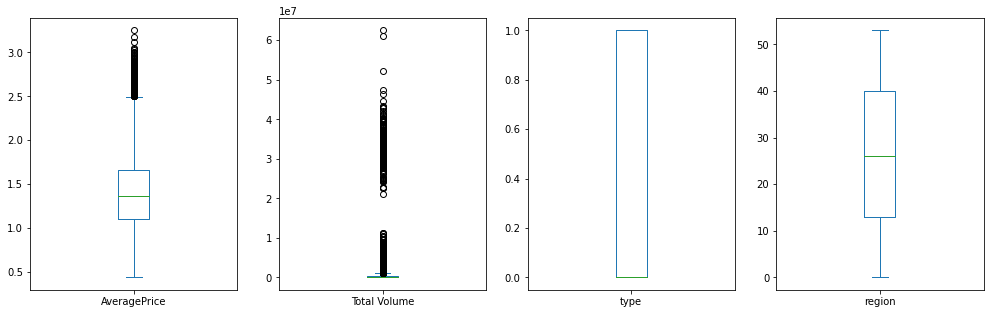

In [27]:
df1.plot(kind = 'box', subplots = True, layout = (1,6) ,figsize=(26,5))

In [28]:
from scipy.stats import zscore
z = np.abs(zscore(df1))
z.shape

(18249, 4)

In [29]:
df2 = df1[(z<3).all(axis=1)]
print(df1.shape)
print(df2.shape)

(18249, 4)
(17947, 4)


In [30]:
loss = (((18249 - 17947)/18249)*100)
loss

1.6548851991889966

# Skewness

In [31]:
df2.skew()

AveragePrice    0.389138
Total Volume    3.566754
type           -0.004124
region          0.014195
dtype: float64

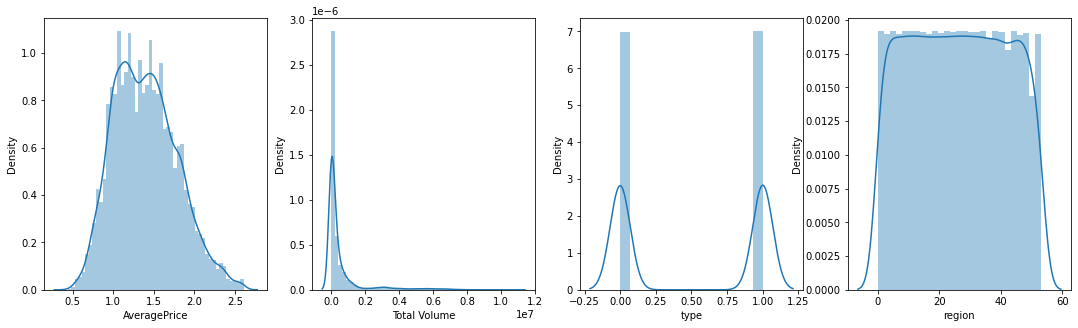

In [32]:
plt.figure(figsize=(28,5))
for i, column in enumerate(df2.columns, 1):
    plt.subplot(1,6,i)
    sns.distplot(df2[column])

In [33]:
df2.describe()

,AveragePrice,Total Volume,type,region
count,17947.000000,1.794700e+04,17947.000000,17947.000000
mean,1.398933,5.459488e+05,0.501031,26.209506
std,0.386659,1.218080e+06,0.500013,15.468255
min,0.440000,8.456000e+01,0.000000,0.000000
25%,1.100000,1.080130e+04,0.000000,13.000000
50%,1.370000,1.066637e+05,1.000000,26.000000
75%,1.660000,4.199044e+05,1.000000,39.000000
max,2.610000,1.089468e+07,1.000000,53.000000


In [34]:
from sklearn.preprocessing import power_transform
X = power_transform(X, method = 'yeo-johnson')
X

array([[-0.08660524, -0.99983562, -2.01155231],
       [-0.15574567, -0.99983562, -2.01155231],
       [ 0.17932662, -0.99983562, -2.01155231],
       ...,
       [-0.77150535,  1.00016441,  1.54383806],
       [-0.69807719,  1.00016441,  1.54383806],
       [-0.66380937,  1.00016441,  1.54383806]])

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.08660524, -0.99983562, -2.01155231],
       [-0.15574567, -0.99983562, -2.01155231],
       [ 0.17932662, -0.99983562, -2.01155231],
       ...,
       [-0.77150535,  1.00016441,  1.54383806],
       [-0.69807719,  1.00016441,  1.54383806],
       [-0.66380937,  1.00016441,  1.54383806]])

# Train test split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [38]:
#Linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))
cvs = cross_val_score(lr, X_train, Y_train, cv=10)
cvs.mean()

MAE: 0.24492210585558002
MSE: 0.09951761666444436
RMSE: 0.31546412896626513
r2score: 0.3806050634665954


0.40763137462040894

In [39]:
#DecisionTree Regressor

from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
pred=dtr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))
cvs = cross_val_score(dtr, X_train, Y_train, cv=10)
cvs.mean()

MAE: 0.2153972602739726
MSE: 0.08882569863013698
RMSE: 0.2980364048738626
r2score: 0.447151270201129


0.4598482112873243

In [40]:
#RandomForest

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
pred = rf.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))
cvs = cross_val_score(rf, X_train, Y_train, cv=10)
cvs.mean()

MAE: 0.18246339726027394
MSE: 0.06191151954520548
RMSE: 0.24882025549622258
r2score: 0.6146643880279938


0.6166685720652348

In [41]:
#Support Vector Regressor model

from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,Y_train)
pred=svr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))
cvs = cross_val_score(svr, X_train, Y_train, cv=10)
cvs.mean()

MAE: 0.23275810334145647
MSE: 0.0938257315622075
RMSE: 0.3063098620061187
r2score: 0.4160312013688211


0.4387659052348907

In [42]:
# KNN

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))
cvs = cross_val_score(knn, X_train, Y_train, cv=10)
cvs.mean()

MAE: 0.17149041095890405
MSE: 0.05456439041095891
RMSE: 0.23359021899676988
r2score: 0.6603927197177868


0.658325238911355

# Hyperparameter Tuning

#  RandomizedSearchCV:

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
n_neighbors    = range(1, 8000, 150)
weights        = ['uniform', 'distance']
algorithm      = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size      = range(1, 7500, 200)
metric         = ['minkowski']

random_grid = {'n_neighbors' : n_neighbors,
               'weights'     : weights,
               'algorithm'   : algorithm,
               'leaf_size'   : leaf_size,
               'metric'      : metric}

print(random_grid)

{'n_neighbors': range(1, 8000, 150), 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': range(1, 7500, 200), 'metric': ['minkowski']}


In [45]:
knn = KNeighborsRegressor()
rscv = RandomizedSearchCV(estimator = knn,
                         param_distributions = random_grid,
                         cv = 10,
                         random_state=100,
                         verbose = 3,
                         n_jobs = -1)

rscv.fit(X_train, Y_train)
rscv

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': range(1, 7500, 200),
                                        'metric': ['minkowski'],
                                        'n_neighbors': range(1, 8000, 150),
                                        'weights': ['uniform', 'distance']},
                   random_state=100, verbose=3)

In [46]:
rscv.best_params_

{'weights': 'distance',
 'n_neighbors': 1651,
 'metric': 'minkowski',
 'leaf_size': 7201,
 'algorithm': 'kd_tree'}

In [47]:
rscv.best_estimator_

KNeighborsRegressor(algorithm='kd_tree', leaf_size=7201, n_neighbors=1651,
                    weights='distance')

In [48]:
best_rscv = rscv.best_estimator_

In [49]:
predrscv = best_rscv.predict(X_test)

In [50]:
print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, predrscv))

cvs = cross_val_score(rscv, X_train, Y_train, cv=10)
cvs.mean()

MAE: 0.17149041095890405
MSE: 0.05456439041095891
RMSE: 0.23359021899676988
r2score: 0.5498796206447456
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


0.5652152550139583

# GridSearchCV 

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
gridcv_grid = {'n_neighbors' : [rscv.best_params_['n_neighbors'],
                                rscv.best_params_['n_neighbors']+2,
                                rscv.best_params_['n_neighbors']+4,
                                rscv.best_params_['n_neighbors']+6],
               
               'weights'     : [rscv.best_params_['weights']],
               
               'algorithm'   : [rscv.best_params_['algorithm']],
               
               'leaf_size'   : [rscv.best_params_['leaf_size'],
                                rscv.best_params_['leaf_size']+2,
                                rscv.best_params_['leaf_size']+4,
                                rscv.best_params_['leaf_size']+6],
               
               'metric'      : [rscv.best_params_['metric']]}

print(gridcv_grid)

{'n_neighbors': [1651, 1653, 1655, 1657], 'weights': ['distance'], 'algorithm': ['kd_tree'], 'leaf_size': [7201, 7203, 7205, 7207], 'metric': ['minkowski']}


In [53]:
knn = KNeighborsRegressor()
gscv = GridSearchCV(estimator = knn,
                         param_grid = gridcv_grid,
                         cv = 10,
                         verbose = 3,
                         n_jobs = -1)
gscv.fit(X_train, Y_train)
gscv

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['kd_tree'],
                         'leaf_size': [7201, 7203, 7205, 7207],
                         'metric': ['minkowski'],
                         'n_neighbors': [1651, 1653, 1655, 1657],
                         'weights': ['distance']},
             verbose=3)

In [54]:
gscv.best_params_

{'algorithm': 'kd_tree',
 'leaf_size': 7201,
 'metric': 'minkowski',
 'n_neighbors': 1651,
 'weights': 'distance'}

In [55]:
gscv.best_estimator_

KNeighborsRegressor(algorithm='kd_tree', leaf_size=7201, n_neighbors=1651,
                    weights='distance')

In [56]:
best_gscv = gscv.best_estimator_

In [57]:
predgrid = best_gscv.predict(X_test)

In [58]:
print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, predrscv))

cvs = cross_val_score(gscv, X_train, Y_train, cv=10)
cvs.mean()

MAE: 0.17149041095890405
MSE: 0.05456439041095891
RMSE: 0.23359021899676988
r2score: 0.5498796206447456
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits


0.5652152550139583

In [59]:
import pickle
filename = 'Avocado Project.pkl'
pickle.dump(knn, open(filename, 'wb'))